In [1]:
#This notebook is used for developing and training model for sentiment analysis
#The classification model is performed using bernoli model, SVC model and logistic regression model
#Logistic regression model and word vectorizer are saved using pickle to be loaded for prediction around new data

In [2]:
#importing utilities
import re
import numpy as np
import pandas as pd

In [3]:
#importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#sklearn: importing classifiers
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [5]:
#sklearn: modelling 
from sklearn.model_selection import train_test_split

In [6]:
#Transforms text to feature vectors that can be used as input to estimator
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
#Importing confusion matrics to show the graohical representation of model performances
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
import pickle

In [9]:
FILE_NAME = 'stockdata_training.csv'

In [10]:
#changing data type to lists
#text, target = list(data['text']), list(data['target'])
%run applying_textprocess.ipynb
#selecting text and target column for analysis
dataset=data[['text','target']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mshak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mshak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#separating input feature and label
#X=dataset.text
#y=dataset.target
X=data['text']
y=data['target']

In [12]:
X

0       [kickers, watchlist, xide, tit, soq, pnk, cpw,...
1       [user, aap, movie, return, feageed, indicator,...
2       [user, id, afraid, short, amzn, looking, like,...
3                                            [mnta, over]
4                                              [oi, over]
                              ...                        
7428    [rt, shannonmmiller, love, apple, supporting, ...
7429    [hey, apple, normal, laptop, charger, solderin...
7430    [marcbulandr, could, not, agree, more, apple, ...
7431    [iphone, s, photos, no, longer, downloading, a...
7432    [rt, swiftkey, were, excited, named, apples, a...
Name: text, Length: 7433, dtype: object

In [13]:
X=X.apply(lambda x: ' '.join(x))

In [14]:
X

0       kickers watchlist xide tit soq pnk cpw bpz aj ...
1       user aap movie return feageed indicator trades...
2       user id afraid short amzn looking like nearmon...
3                                               mnta over
4                                                 oi over
                              ...                        
7428    rt shannonmmiller love apple supporting hourof...
7429    hey apple normal laptop charger soldering skin...
7430    marcbulandr could not agree more apple twitter...
7431    iphone s photos no longer downloading automati...
7432    rt swiftkey were excited named apples app stor...
Name: text, Length: 7433, dtype: object

In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7428    1
7429    0
7430    1
7431    0
7432    1
Name: target, Length: 7433, dtype: int64

In [16]:
#splitting to train and test subsets (90% vs 10%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =1000)

In [17]:
#fit TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=15000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

In [18]:
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  15000


In [19]:
#Saving the trained vectorizer to be used in apply_model_stock notebook

In [20]:
with open('stock_vectorizer.pk', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [21]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [22]:
#function for model evaluation
#accuracy score, confusion matrix with plot. ROC_AUC curve

In [23]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [24]:
# model building

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       166
           1       0.72      0.84      0.77       206

    accuracy                           0.73       372
   macro avg       0.73      0.72      0.72       372
weighted avg       0.73      0.73      0.72       372



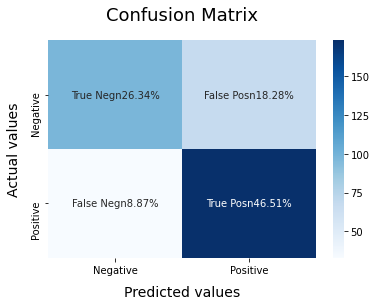

In [25]:
#bernoli model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       166
           1       0.79      0.79      0.79       206

    accuracy                           0.77       372
   macro avg       0.76      0.76      0.76       372
weighted avg       0.77      0.77      0.77       372



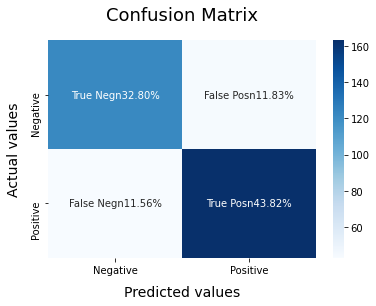

In [26]:
#SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       166
           1       0.77      0.82      0.80       206

    accuracy                           0.77       372
   macro avg       0.76      0.76      0.76       372
weighted avg       0.77      0.77      0.76       372



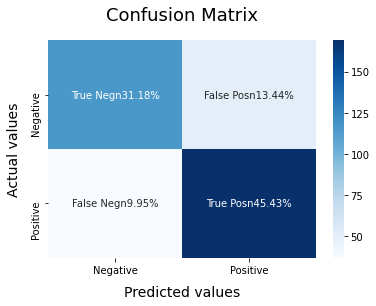

In [27]:
#logistic regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [28]:
#the three models have similar performance

In [29]:
#As the logistic regression model is performing slightly better and it is well suited for classification problem, we save this to use on Amazon tweets

In [30]:
pickle.dump(LRmodel, open('stock_LRmodel.sav', 'wb'))